Coding Perceptron from scratch for binary classification,
for Advanced Deep Learning Course, Fall 2023,

Programmed by Ardavan Modarres
ardavan.modarres@email.kntu.ac.ir
* 2023-10-04: Initial coding


In [1]:
# import npackages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from matplotlib import animation
print("numpy version : ", np.__version__)
print("pandas version : ", pd.__version__)
print("scipy version : ", scipy.__version__)
print("")
print("done!")

numpy version :  1.21.5
pandas version :  1.1.3
scipy version :  1.7.3

done!


In [2]:
# defining a function for data generation
def generate_data(n1, n2, mean1, cov1, mean2, cov2):
    x1 = np.random.multivariate_normal(mean1, cov1, n1)
    x2 = np.random.multivariate_normal(mean2, cov2, n2)
    y1 = np.ones((n1, 1))
    y2 = -np.ones((n2, 1))

    plt.scatter(x1[:, 0], x1[:, 1], c = "red", s = 30)
    plt.scatter(x2[:, 0], x2[:, 1], c = "green", s = 30)
    plt.axis('equal')
    plt.show()

    x1 = np.concatenate((x1, np.ones((n1, 1))), axis = 1)
    x2 = np.concatenate((x2, np.ones((n2, 1))), axis = 1)
    x1 = np.concatenate((x1, y1), axis = 1)
    x2 = np.concatenate((x2, y2), axis = 1)

    xy = np.concatenate((x1, x2), axis = 0)
    print("xy.shape: ", xy.shape)
    print("xyheader: ", xy[0:5,:])

    return xy


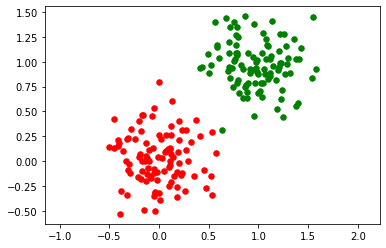

xy.shape:  (200, 4)
xyheader:  [[-0.06564438  0.13264031  1.          1.        ]
 [ 0.19973839  0.20745516  1.          1.        ]
 [ 0.26413966 -0.30154865  1.          1.        ]
 [-0.03866999 -0.31530452  1.          1.        ]
 [ 0.53313458 -0.34254084  1.          1.        ]]


In [3]:
n1 = 100
n2 = 100
# data generation
mean1 = [0, 0]
cov1 = [[0.06, 0], [0, 0.06]]  # diagonal covariance
mean2 = [1, 1]
cov2 = [[0.06, 0], [0, 0.06]]  # diagonal covariance

xy = generate_data(n1, n2, mean1, cov1, mean2, cov2)

In [4]:
class Perceptron:
    def __init__(self, xy, learning_rate, num_epochs):
        self.xy = xy
        self.num_samples = xy.shape[0]
        self.num_features = xy.shape[1]-1
        self.lr = learning_rate
        self.num_epochs = num_epochs
        self.wb = np.random.normal(0, .25, size=(self.num_features, 1))
        self.history = np.zeros((num_epochs, self.num_features, 1))
        self.history[0] = self.wb


    def fit(self):
        for j in range(self.num_epochs):
            if j%100 ==0:
                print("Epoch : ", j)
            for idx, xt in enumerate(self.xy):
                net = np.matmul(self.wb.T, xt[0:self.num_features].reshape(-1, 1)).item()
                y_pred = self.activation_function(net)
                # Perceptron update rule
                self.wb += self.lr* (xt[self.num_features].item() - y_pred)*xt[0:self.num_features].reshape(-1, 1)
            self.history[j] = self.wb
            # print(self.history)

    def predict(self, xy):
        net = np.matmul(self.wb.T, xy[0:self.num_features].reshape(-1, 1)).item()
        y_pred = self.activation_function(net)
        return y_pred

    def activation_function(self, net):
        return np.where(net >= 0, 1, -1)

    def plot_hyperplane(self):
        class1_idx = np.where(self.xy[:, 3] == 1.)[0]
        class2_idx = np.where(self.xy[:, 3] == -1.)[0]
        x1 = self.xy[class1_idx, 0:2]
        x2 = self.xy[class2_idx, 0:2]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(x1[:, 0], x1[:, 1], c = "red", s = 30)
        plt.scatter(x2[:, 0], x2[:, 1], c = "green", s = 30)
        plt.axis('equal')

        x0_1 = np.amin(self.xy[:, 0])
        x0_2 = np.amax(self.xy[:, 0])
        x1_1 = (-self.wb[0,0] * x0_1 - self.wb[2,0]) / self.wb[1,0]
        x1_2 = (-self.wb[0,0] * x0_2 - self.wb[2,0]) / self.wb[1,0]
        plt.plot([x0_1, x0_2], [x1_1, x1_2], "k")

        ymin = np.amin(xy[:, 1])
        ymax = np.amax(xy[:, 1])
        ax.set_ylim([ymin - 0.5, ymax + 0.5])


        plt.show()

Epoch :  0
Epoch :  100
Epoch :  200


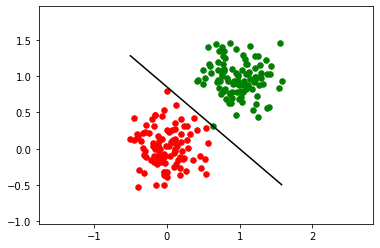

In [5]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

p = Perceptron(xy, 0.005, 201)
p.fit()
p.plot_hyperplane()